In [1]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#import data from the cleaned CSV files
movieGross = pd.read_csv('cleanedData/movieGrossClean.csv')
movieBudgets = pd.read_csv('cleanedData/movieBudgets.csv')
movieInfo = pd.read_csv('cleanedData/movieInfoClean.csv')
reviews = pd.read_csv('cleanedData/reviewsClean.csv')
tmdbMovies = pd.read_csv('cleanedData/tmdbMoviesClean.csv')

In [3]:
# Connect to sql database
conn = sqlite3.connect('data/im.db')

In [4]:
# view movieGross
movieGross.head()

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,3,Inception,WB,292600000,535700000,2010-01-01
4,4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [5]:
# view movieBudgets
movieBudgets.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [6]:
# view movieInfo
movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
3,6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
4,7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [7]:
# view reviews
reviews.head()

,Unnamed: 0,id,review,rating,fresh,critic,top_critic,publisher,date
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [8]:
# view tmdbMovies
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


***
### Popularity by Genre: 
Which Genres are the most popular?

In [9]:
#start by viewing the tmdbMovies columns
tmdbMovies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genres', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [10]:
# we are most interested in columns after 10, as those are the genres
tmdbMovies.columns[11:]

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<AxesSubplot:>

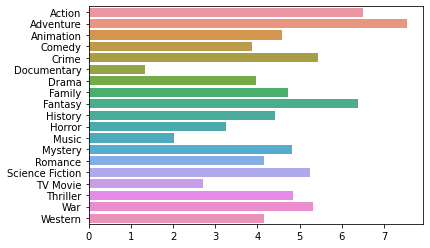

In [11]:
# create a dictionary that gets the mean popularity score for each genre
popularityByGenre = {}
for i in range(11,30):
    popularityByGenre[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1]['popularity'].mean()

# barplot that shows popularity genre score for every genre
sns.barplot(y = list(popularityByGenre.keys()), x=list(popularityByGenre.values()))

In [12]:
# get popularity and release date for each genre
genre_dicts = {}
for i in range(11,30):
    genre_dicts[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1][['popularity','release_date']]
#add popularity to genre_dicts to be able to see the change in popularity over years
for i in genre_dicts:
    genre_dicts[i]['year'] = pd.to_datetime(genre_dicts[i]['release_date']).dt.year

In [13]:
#view the new dictionary that contains poularity scores, release dates, and years for each movie
print(genre_dicts.keys())
genre_dicts["Action"]

dict_keys(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'])


,popularity,release_date,year
2,28.515,2010-05-07,2010
4,27.920,2010-07-16,2010
6,26.526,2009-12-18,2009
9,22.855,2010-11-04,2010
12,21.517,2010-08-03,2010
...,...,...,...
26399,0.600,2018-12-20,2018
26440,0.600,2018-01-03,2018
26479,0.600,2018-04-15,2018
26514,0.600,2018-10-01,2018


In [14]:
# use groupby and average to create an an average popularity for each year for every genre
avgPopByGenre = {}
for i in genre_dicts:
    avgPopByGenre[i] = genre_dicts[i].groupby(genre_dicts[i]['year']).mean()

In [15]:
#view new popularity dictionary
avgPopByGenre

{'Action':       popularity
 year            
 1974    9.569000
 1980   14.882000
 1982   12.063000
 1983    6.306000
 1984    7.833500
 1985    7.561000
 1986    6.852500
 1988    3.880500
 1989    1.400000
 1991   16.735750
 1993   11.485000
 1995   13.966333
 1996   10.174667
 1997   11.832500
 1998   16.487000
 2001   10.886000
 2002   15.067667
 2003    8.661000
 2004   16.482667
 2005   10.215000
 2007   15.620000
 2008    0.613000
 2009    9.651500
 2010    4.980996
 2011    5.259779
 2012    5.594142
 2013    5.574356
 2014    6.578004
 2015    6.326961
 2016    6.260686
 2017    7.906579
 2018    9.237353
 2019   10.414750,
 'Adventure':       popularity
 year            
 1961    3.454000
 1966    7.139000
 1968   23.781000
 1982   12.063000
 1985   11.657000
 1986    9.818600
 1988    6.744000
 1995   10.579000
 1996   13.860000
 1997   13.514000
 1998   15.799000
 2003    8.613000
 2004   15.203667
 2005    4.862333
 2006    1.937000
 2008    8.787000
 2009    8.353500
 201

<AxesSubplot:xlabel='year', ylabel='popularity'>

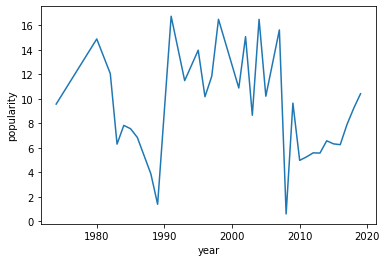

In [16]:
# view trend in popularity by genre
sns.lineplot(x = avgPopByGenre['Action'].index, y = avgPopByGenre['Action']["popularity"])

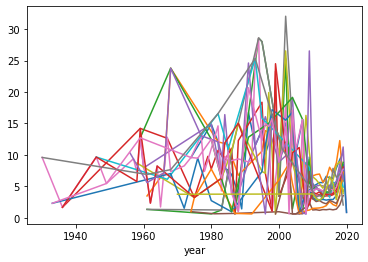

In [17]:
# Make a plot with all genre trends on one chart
for i in avgPopByGenre:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)

In [18]:
# it worked. Split into important genres. This is too busy
# We have the list of most popular genres. Lets view the top 5 most popular generes

#get list of top 5 genres
mostPopGenre = sorted(popularityByGenre, key=popularityByGenre.get, reverse=True)[:5]
mostPopGenre

['Adventure', 'Action', 'Fantasy', 'Crime', 'War']

In [19]:
# get the avergae popularity score over the past 10 years for the action genre
avgPopByGenre['Action'][avgPopByGenre['Action'].index>2009]

,popularity
year,
2010,4.980996
2011,5.259779
2012,5.594142
2013,5.574356
2014,6.578004
2015,6.326961
2016,6.260686
2017,7.906579
2018,9.237353


In [20]:
#average poularitty  for the last 10 years for every genre
popLastTenYears = {}
for genre in avgPopByGenre:
    popLastTenYears[genre] = float(avgPopByGenre[genre][avgPopByGenre[genre].index>2009].mean())

In [21]:
# Get the most popular genres in the past 10 years
mostPop10YR = sorted(popLastTenYears, key=popLastTenYears.get, reverse=True)[:5]
mostPop10YR

['Adventure', 'Action', 'Fantasy', 'Crime', 'Science Fiction']

These 2 lists share 4 categories: **'Adventure', 'Action', 'Fantasy', 'Crime'**.

It seems that war movies have lost popularity, while science fiction has taken its spot in the top 5.
**War** fell from #5 to #8
**Science Fiction** climbed from #6 to #5
The following graph will include: **['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']**

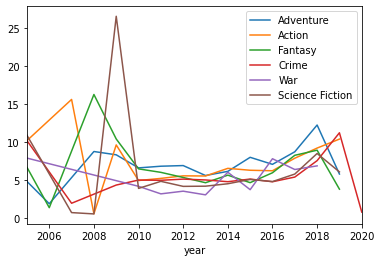

In [22]:
#plot the most popular genres on one graph.
fig, ax = plt.subplots()
ax.set_xlim(2005,2020)
for i in ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)
ax.legend(['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction'])

The Graph above is busy. Lets seperate the lines to get a better idea

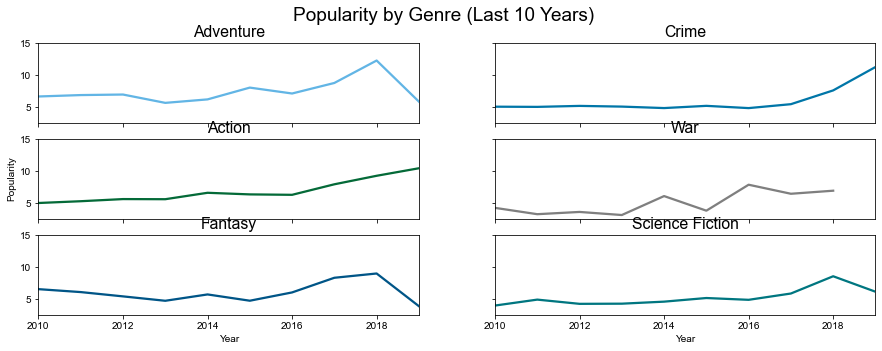

In [23]:
# Graph the most popular genres on 6 graphs on the same figure
fig, ax = plt.subplots(3,2, sharex = True, sharey=True, figsize=(15,5))

sns.set_context('talk', font_scale=.88)
fig.suptitle('Popularity by Genre (Last 10 Years)')
colors = ['#62b5e5','#046a38','#005587','#0076a8','#7f7f7f','#007680']
l = ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']
for i in range(len(l)):
    ax[int(i%3)][int(i//3)].set_xlim(2010,2019)
    ax[int(i%3)][int(i//3)].set_ylim(2.5,15)
    ax[int(i%3)][int(i//3)].set_title(l[i])
    ax[1][0].set_ylabel('Popularity')
    ax[2][0].set_xlabel('Year')
    ax[2][1].set_xlabel('Year')
    
    sns.lineplot(ax=ax[i%3][i//3], x=avgPopByGenre[l[i]].index, y=avgPopByGenre[l[i]]['popularity'].values, color=colors[i])
sns.set_style('darkgrid')

While war was not popular in the early 2010's, it has been gaining some momentum. Movies Action and crime have been increasing steadily, while the others seem more or less random. With only 10 years of data, its hard to tell where these genres are really headed

***
### Profitability By Genre (average)
This section will help determine which genres have the highest profitability.

In [24]:
#view the data we will be working with
movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
3,6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
4,7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [25]:
# there are only USD in this dataset. No conversions needed
movieInfo['currency'].value_counts()

-    1217
$     339
Name: currency, dtype: int64

C:\Users\aplante\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_office', ylabel='Density'>

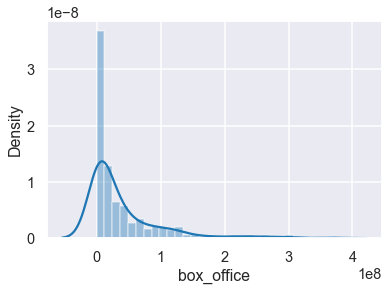

In [26]:
# Visualize the distribution of box office sales
sns.distplot(movieInfo[movieInfo['box_office']>0]['box_office'])
# There are many small numbers in box office sales.
# This resembles a power law distribution

In [27]:
# Check the type of the genre column
type(movieInfo['genre'][2])

str

The goal right now is to be able to work with the genre column. We want to create a column for each genre, where it lists true or false if the given movie is of that genre. This will make visualizations and analysis easier:

In [28]:
# The Genre column is of type string, when it should be list. 
# Changing the string to list using the code below
import ast
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [29]:
#confirm that the change was successful
type(movieInfo['genre'][2])

list

In [30]:
# Getting a list of all the genres that show up in the genres column.
valCGenres = list(movieInfo['genre'].value_counts().index)
l = []
for i in valCGenres:
    for j in i:
        l.append(j)
genres=set(l)
print(genres)
genres = list(genres)

{'Horror', 'Action', 'Special Interest', 'Gay and Lesbian', 'Classics', 'Faith and Spirituality', 'Mystery', 'Animation', '-', 'Art House and International', 'Western', 'Science Fiction', 'Documentary', 'Comedy', 'Adventure', 'Family', 'TV Movie', 'Music', 'Romance', 'Fantasy', 'Cult Movies', 'Anime and Manga', 'Drama', 'Sports and Fitness'}


In [31]:
# Creates a column for every value in the genres list and returns true if that value shows up in the genre column
for i in range(len(genres)):
    movieInfo[genres[i]] = (movieInfo['genre'].map(lambda x: genres[i] in x).astype(int))

In [32]:
# Ensure that the change was a success
movieInfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,Adventure,Family,TV Movie,Music,Romance,Fantasy,Cult Movies,Anime and Manga,Drama,Sports and Fitness
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,...,1,0,0,0,0,0,0,0,1,0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,...,0,0,0,0,0,1,0,0,1,0
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Music]",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery]",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,...,0,0,0,0,0,0,0,0,1,0
4,7,-,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,-,-,-,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1996,Forget terrorists or hijackers -- there's a ha...,R,"[Action, Adventure, Horror, Mystery]",-,-,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,...,1,0,0,0,0,0,0,0,0,0
1552,1997,The popular Saturday Night Live sketch was exp...,PG,"[Comedy, Science Fiction, Fantasy]",Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,-,0.0,...,0,0,0,0,0,1,0,0,0,0
1553,1998,"Based on a novel by Richard Powell, when the l...",G,"[Classics, Comedy, Drama, Music]",Gordon Douglas,-,1962-01-01 00:00:00,2004-05-11 00:00:00,-,0.0,...,0,0,0,1,0,0,0,0,1,0
1554,1999,The Sandlot is a coming-of-age story about a g...,PG,"[Comedy, Drama, Family, Sports and Fitness]",David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,-,0.0,...,0,1,0,0,0,0,0,0,1,1


We successfully created boolean columns for the genres. Now we may begin data analysis. 

Lets start by looking to see the **median box office revenue** for every genre:

In [33]:
#create dictionary that shows median box office for every genre 
genre_dict2={}
for i in genres:
    genre_dict2[i] = movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'].astype(int).median()

In [34]:
# view this new dictionary
genre_dict2

{'Horror': 19755422.0,
 'Action': 36282491.0,
 'Special Interest': 308164.0,
 'Gay and Lesbian': nan,
 'Classics': 6750000.0,
 'Faith and Spirituality': 4894004.0,
 'Mystery': 17230619.5,
 'Animation': 42194060.0,
 '-': nan,
 'Art House and International': 1089802.0,
 'Western': 7200000.0,
 'Science Fiction': 33075902.0,
 'Documentary': 419361.0,
 'Comedy': 17364602.0,
 'Adventure': 36282491.0,
 'Family': 39764012.0,
 'TV Movie': 2927972.0,
 'Music': 4894004.0,
 'Romance': 22701447.5,
 'Fantasy': 33075902.0,
 'Cult Movies': 13900000.0,
 'Anime and Manga': nan,
 'Drama': 8518148.0,
 'Sports and Fitness': 21241679.0}

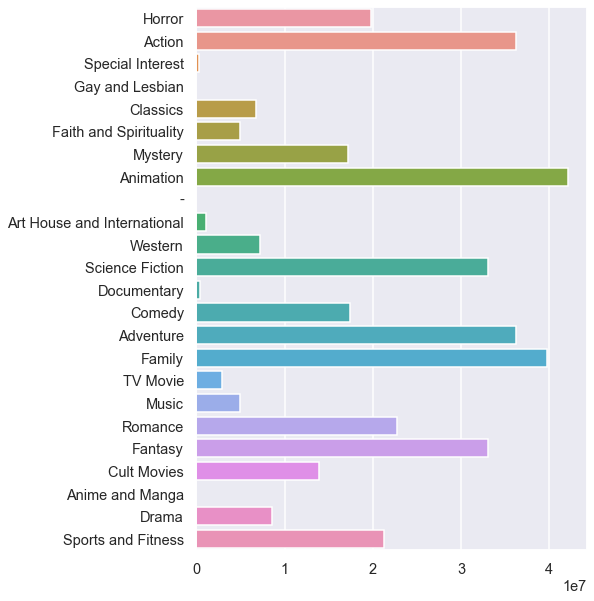

In [35]:
# There are nan values in this, likely because those genres had no recorded revenue
# For now, we will leave them in the dataset. We will remove later

# Graph the median box office sales for each genre
fig, ax = plt.subplots(figsize=(7,10))
sns.barplot(y = list(genre_dict2.keys()), x=list(genre_dict2.values()))
plt.show()

This bargrraph shows good information. Now lets clean it up to select only the genres with 25 or more recorded box office sales in the database

In [36]:
# Creating a dictionary that shows the number of genres with recorded box office sales for each genre
genre_dict_len={}
for i in genres:
    genre_dict_len[i] = len(movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'])

# Create a second Genre Length dictionary for items with over 24 recorded box office sales instances
gdl2 = {k:v for (k,v) in genre_dict_len.items() if v>25}

In [37]:
# Create a new dictionary from the ones above that shows median box office sales 
# for films with over 24 recorded box office sales instances 
avgRevforPopularGenres = {k:v for (k,v) in genre_dict2.items() if k in gdl2.keys()}

# sort the values
avgRevforPopularGenres = {k:v for k,v in sorted(avgRevforPopularGenres.items(), key=lambda item: item[1], reverse = True)}


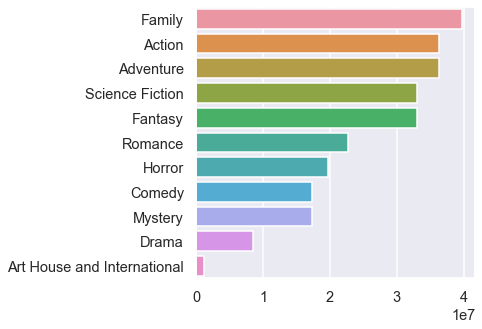

In [38]:
# Plot the median box office sales for films with over 24 recorded box office sales instances
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y = list(avgRevforPopularGenres.keys()), x=list(avgRevforPopularGenres.values()))
plt.show()

The box plot above shows that Family films has the highest median profit, followed by Action and Adventure, then Fantasy and Science Fiction.

### Runtime and sales
We are going to investigate the effect that box runtime has on box office sales.

In [39]:
# View both columns
movieInfo['runtime'].head()
movieInfo['box_office'].head()

0         0.0
1    600000.0
2         0.0
3         0.0
4         0.0
Name: box_office, dtype: float64

In [40]:
# Create new table that only includes rows with recorded sales
sales = movieInfo[movieInfo['box_office']>0]

# Check to ensure there are no 0s
sales['box_office']

1         600000.0
6       41032915.0
7         224114.0
8         134904.0
15       1039869.0
           ...    
1538    25335935.0
1539     1416189.0
1541       59371.0
1542      794306.0
1551    33886034.0
Name: box_office, Length: 339, dtype: float64

<AxesSubplot:xlabel='runtime', ylabel='box_office'>

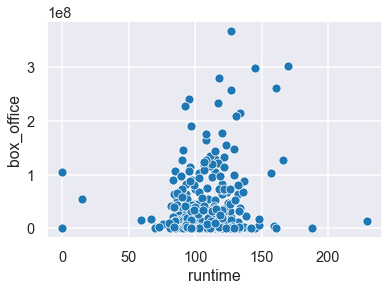

In [41]:
# Create a scatterplot to visualize the relationship between box office sales and runtime
sns.scatterplot(x=sales['runtime'], y=sales['box_office'])
# There looks to be little correlation.

It looks like there is little correlation between run time and box office sales. This relationship should not be viewed any longer

### Gross Income by Year
We will view how the gross income has changed across years

In [42]:
# View the table we are 
movieGross.head()

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,3,Inception,WB,292600000,535700000,2010-01-01
4,4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [43]:
# Change the year column to a data time, and take the median for the
movieGross['year'] = pd.to_datetime(movieGross['year']).dt.year
dgByYear = movieGross['domestic_gross'].groupby(movieGross['year']).median()

<AxesSubplot:xlabel='year', ylabel='domestic_gross'>

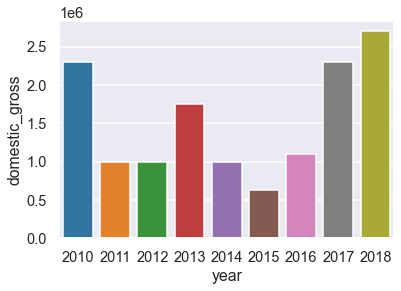

In [44]:
#plot the distribution
sns.barplot(x = dgByYear.index, y=dgByYear)

There is no clear relationship between year and median gross revenue. This distribution is still interesting to see.

### Return on Investment by Month of Release
We will determine if there is a relationship between Return on Investment (ROI) and the month a movie is released.

                        ROI(%) = profit/cost = (revenue-cost)/cost

In [45]:
# Making new column for Return on investment
#ROI = profit / cost
movieBudgets['ROI']=(movieBudgets['worldwide_gross']-movieBudgets['production_budget'])/movieBudgets['production_budget']*100

In [46]:
# Check if the column was created and the numbers are reasonable
movieBudgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...,...
5777,5777,78,2018-12-31,Red 11,7000,0,0,-100.000000
5778,5778,79,1999-04-02,Following,6000,48482,240495,3908.250000
5779,5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-100.000000


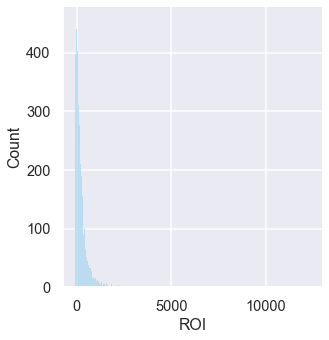

In [87]:
#lets view the distribution of ROI to get a beetter understanding of the data
sns.displot(movieBudgetsAdj['ROI'])
#This resembles a power law distribution, where most ROI values are around 0

In [47]:
# To analyze by month and year, we need to convert teh relase date into a data time
# Then, we need to make a month column. I added a year in case we want to analyze further
movieBudgets['release_date'] = pd.to_datetime(movieBudgets['release_date'])
movieBudgets['month'] = movieBudgets['release_date'].dt.month
movieBudgets['year'] = movieBudgets['release_date'].dt.year
movieBudgets.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017


27984448.5

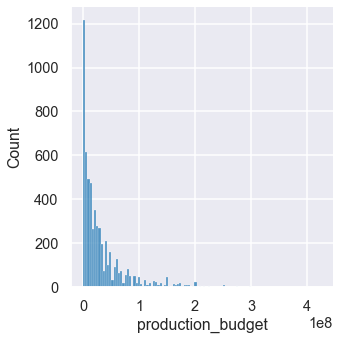

In [48]:
# Create a distribution plot to visualize the distribution of production budget 
# This should inform the insights we find
sns.displot(movieBudgets['production_budget'])
movieBudgets['production_budget'].median()
movieBudgets['worldwide_gross'].median()

In [49]:
# only want ot select movies with bigger budgets and revenue. 
movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017
...,...,...,...,...,...,...,...,...,...,...
5195,5195,96,2012-03-23,Serbuan maut,1100000,4105123,9297407,745.218818,3,2012
5196,5196,97,1986-09-26,Down by Law,1100000,1436000,1436000,30.545455,9,1986
5197,5197,98,1987-09-04,The Offspring,1100000,1355728,1355728,23.248000,9,1987
5208,5208,9,2009-12-11,Rocket Singh: Salesman of the Year,1070000,164649,5348767,399.884766,12,2009


<AxesSubplot:xlabel='month', ylabel='ROI'>

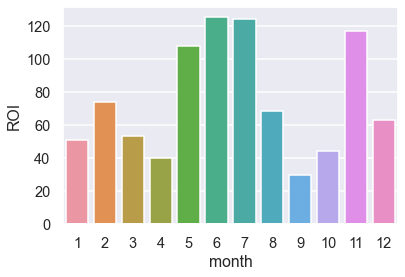

In [50]:
# Create a Series that lists the median ROI based on the month
medianByMonth = movieBudgets['ROI'].groupby(movieBudgets['month']).median()

# Show the distribution of median ROI by month.
sns.barplot(x=medianByMonth.index, y=medianByMonth)
# There seems to be a clear difference between ROI and month

Text(0, 0.5, 'Return on Investment (%)')

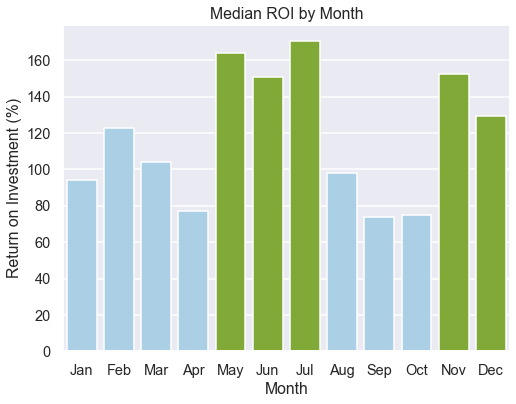

In [54]:
# We are going to use this in out presentation so lets make it look nice

# movieBudgetAdj to select only movies with large budgets and revenue
movieBudgetsAdj = movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]

# take the median ROI by month
medianByMonthAdj = movieBudgetsAdj['ROI'].groupby(movieBudgetsAdj['month']).median()

#set ip chart
fig, ax = plt.subplots(figsize = (8,6))
# set title of chart
ax.set_title('Median ROI by Month')
# set colors to emphasize the important months
col = ['#A1D3EF','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25','#86bc25','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25']
sns.set_palette(sns.color_palette(col))
# Create and label the plot
sns.barplot(x=medianByMonthAdj.index, y=medianByMonthAdj)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Return on Investment (%)')

This visulaization is great to describe the optimal time to relase a movie. Lets make more:

<AxesSubplot:xlabel='month', ylabel='ROI'>

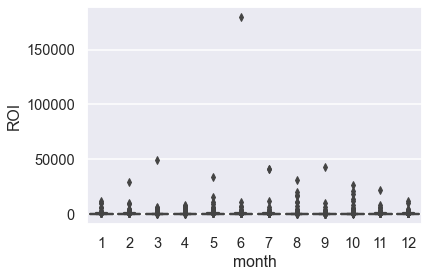

In [72]:
# Create a boxplot Distribtion of ROI to get a better idea of mins, maxes, and quartiles
sns.boxplot(x=movieBudgets['month'], y=movieBudgets['ROI'])
# This does not show a lot, lets change the y limits

Text(0, 0.5, 'Return on Investment')

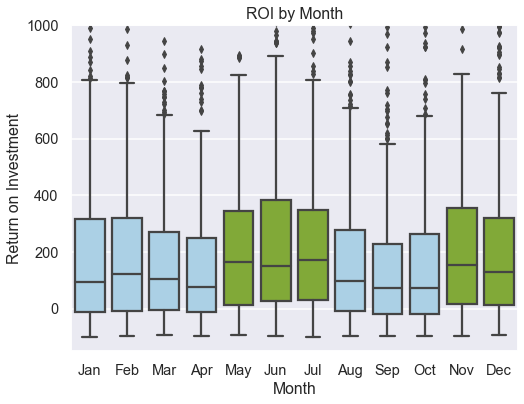

In [73]:
# Create a stacked boxplot chart to show the distribution of ROI for each genre
fig, ax = plt.subplots(figsize = (8,6))
ax.set_ylim(-150,1000)
ax.set_title("ROI by Month")
sns.boxplot(x=movieBudgetsAdj['month'], y=movieBudgetsAdj['ROI'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Return on Investment')

In [74]:
julyMedian = medianByMonthAdj[7]
TotalMedian = movieBudgetsAdj['ROI'].median()

ROI seems to be higher in the green months. Lets try to find out why. Viewing the **mean production budget** may give us some insight

Text(0, 0.5, 'Production Budget (in Millions of $)')

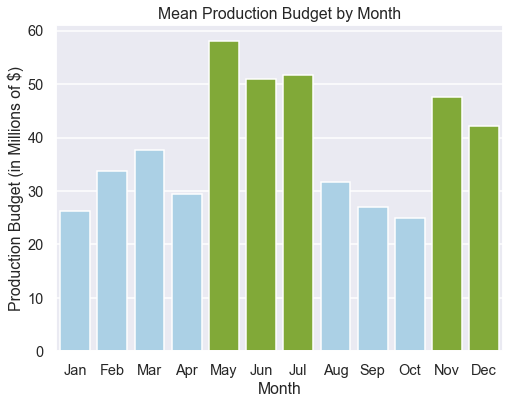

In [75]:
# get mean budget by month
meanBudgetByMonthAdj = movieBudgets['production_budget'].groupby(movieBudgetsAdj['month']).mean()

# Create and format graph
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Mean Production Budget by Month')
col = ['#A1D3EF','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25','#86bc25','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25']
sns.set_palette(sns.color_palette(col))
sns.barplot(x=meanBudgetByMonthAdj.index, y=meanBudgetByMonthAdj/1000000)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Production Budget (in Millions of $)')

Text(0, 0.5, 'Production Budget')

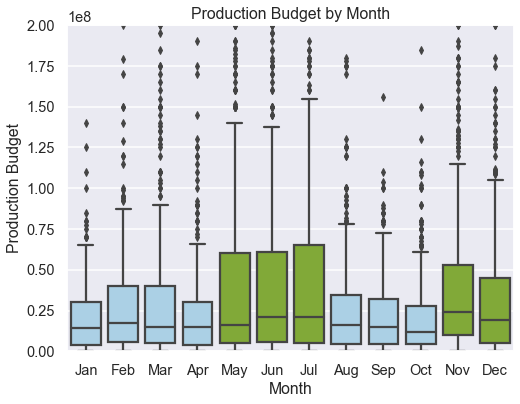

In [76]:
# Create a stacked boxplot chart to show the distribution of Production budget for each genre
fig, ax = plt.subplots(figsize = (8,6))
ax.set_ylim(-150,200000000)
ax.set_title("Production Budget by Month")
sns.boxplot(x=movieBudgets['month'], y=movieBudgets['production_budget'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Production Budget')

The Production Budget is also higher, which means that they likely put more effort into those movies. Lets also view the gross earnings by month:

Text(0, 0.5, 'Gross Earnings')

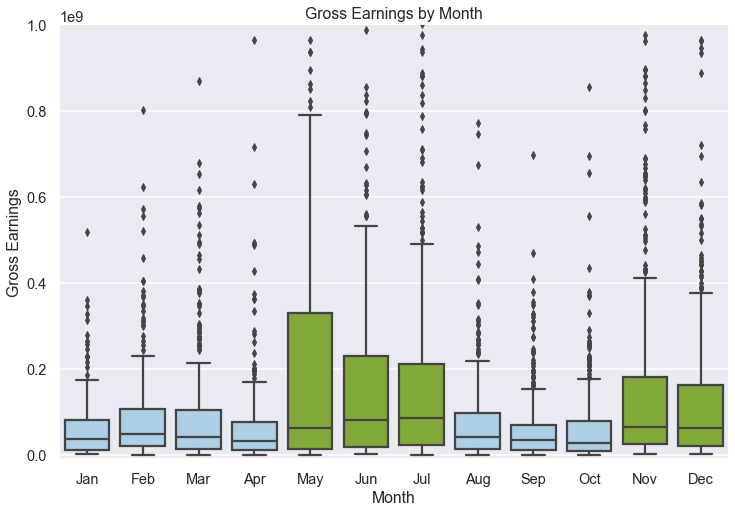

In [77]:
movieBudgetsAdj = movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]
fig, ax = plt.subplots(figsize = (12,8))
ax.set_ylim(-10000000,1000000000)
ax.set_title("Gross Earnings by Month")
sns.boxplot(x=movieBudgetsAdj['month'], y=movieBudgetsAdj['worldwide_gross'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Gross Earnings')

This distribution is very similar to the last two.

Finally, we will run statistical tests to ensure that this relationship is significant. We will start with a t-test:

**H0:** July mean ROI  <=  Population mean ROI

**H1:** July mean ROI > Population mean ROI

In [91]:
# Create a function to run a t-test on some data given the information
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.displot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    xbar = np.mean(sample)
    n = len(sample)
    
    # Sample Standard Deviation (sigma) using Numpy
    s = np.std(sample, ddof = 1)
    
    # Degrees of freedom
    df = n-1
    
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1-alpha, df=df)
    
    # Calculate the results     
    results = stats.ttest_1samp(a=sample, popmean=mu)   
    # return results
    return results

Ttest_1sampResult(statistic=1.2481258704995004, pvalue=0.2128052327899593)

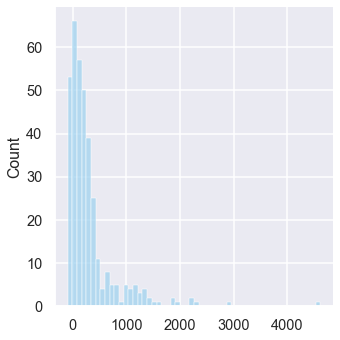

In [92]:
julyROI = list(movieBudgetsAdj[movieBudgetsAdj['month']==7]['ROI'])
mu=movieBudgetsAdj['ROI'].mean()
alpha=.9
one_sample_ttest(julyROI, mu, alpha)

The P value for this test is only .21, which means we can reject the null hypothesis with 79% certainty. This is not great. We cannot comfortably say that the July mean ROI is significantly different.

This is not the end of our tests. We can still prove something else. In this case, we can use an ANOVA to prove that the means for all months are not equal. We will choose an alpha value of .9

**H0:** The mean ROI is equal across all months
**H1:** The mean ROI is not equal across all months (at least one month is not the same as another)

In [93]:
di = {}
for i in range(1,13):
    di[i]=movieBudgetsAdj[movieBudgetsAdj['month']==i]['ROI']
    di[i] = list(di[i].values)
stats.f_oneway(di[1],di[2],di[3],di[4],di[5],di[6],di[7],di[8],di[9],di[10],di[11],di[12])

F_onewayResult(statistic=1.7831764145772773, pvalue=0.05125699045835469)

In [95]:
# Alternatively
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform ANOVA
mbCat = movieBudgetsAdj.copy()
mbCat['month'] = mbCat['month'].astype(str)

model = ols('ROI ~ C(month)', data=mbCat).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(month),7.676880e+06,11.0,1.783176,0.051257
Residual,1.786646e+09,4565.0,NaN,NaN


In [99]:
mbCat['month'].value_counts()

12    552
10    448
11    425
6     400
8     386
9     376
3     375
7     357
4     353
5     326
2     313
1     266
Name: month, dtype: int64

The p-value of this test is .051. This means that with about 95% certiainty, we can say that the mean ROI differes significantly between months. This is great news, as it statistically proves the impact of month on ROI

Below, we will use some statistical methods to create models to try to predict ROI and Box Office Sales, respectively.

In [101]:
# Run Regression model, Trying to use the month of the year to predict ROI 
mod = ols(formula='ROI ~ month', data = mbCat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.783
Date:                Thu, 27 Oct 2022   Prob (F-statistic):             0.0513
Time:                        17:21:48   Log-Likelihood:                -35958.
No. Observations:                4577   AIC:                         7.194e+04
Df Residuals:                    4565   BIC:                         7.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     232.0928     38.358      6.051      

The P value for each month can be seen in the P>|t| column. No months have prediction capabilities with a p value less than .05. However, the p-value does reveal which months have the most certian effect on ROI, indicated by the lowest p-values. The coefficeint reveal the strength of the relationship between ROI and month, as well as the direction. The higher the coefficient, the greater impact the month has on ROI. Months with negative coefficeints decrease ROI.  



In [108]:
# Build a regression model to predict box office sales based on runtime, rating, and genre.
cleanMI = movieInfo[(movieInfo['runtime']>30)& (movieInfo['box_office']>0)]
mod = ols(formula='box_office ~ runtime + rating + Documentary + Q("Art House and International") + Western +\
    Horror + Q("Cult Movies") + Action + Q("TV Movie") + Comedy + Mystery + Q("Faith and Spirituality") +\
    Classics + Fantasy + Q("Special Interest") + Drama + Animation + Q("Anime and Manga")+\
    Q("Gay and Lesbian") + Family  + Music + Romance + Q("Sports and Fitness")', data = cleanMI)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     5.218
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.09e-13
Time:                        17:31:13   Log-Likelihood:                -6421.6
No. Observations:                 336   AIC:                         1.290e+04
Df Residuals:                     310   BIC:                         1.299e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Some interesting observations can be seen:
- unrated movies have a large negative effect on the sales (makes sense because likely smaller)
- greater runtime indicated more sales. This is likely because movies with very small run time do not do well (Coeff = 9.975e+05 ; p = 0.0)
- Art House and International perform poorly (Coeff = -1.74e+07 ; p = 0.081)
- Western Movies Perform Poorly (Coeff = -3.773e+07 ; p = 0.076)
- Action movies sell well (Coeff = 2.005e+07 ; p = 0.009) (very strong relationship)
- Classics Perform Poorly (Coeff = -9.378e+07 ; p = 0.014) (strong relationship)
- Fantasy Performs Well (Coeff = 2.114e+07 ; p = 0.048) (strong relationship)
- Drama performs poorly (Coeff = -1.936e+07 ; p = 0.006)

While ROI and Sales are hard to predict, trying to predict them gave some interesting insights